# Bucket model example

In this notebook an example for the application of the bucket Model is given.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pgg import bucketModel

First, the settings for the public goods game using the bucket model are defined.

In [2]:
# total number of players
nplayers = 300

# rounds each player (approximately) plays
rounds = 100

# Public goods game settings 
# number of players that is offered to play PGG
nparticipants = 5 

# cost of participating
c = 1.

# multipliaction factor for the pot
r = 3.

# loners payoff
sigma = 1.

# Allocate array to save the time evolution of strategies
strategies = np.zeros(shape=(rounds,3))

Now, the bucket model is initialized using a predescribed distribution of cooperators, defectors and loners (here: 40% cooperators, 10% defectors and 50% loners).

In [3]:
bm = bucketModel(nplayers,inital_distribution=[0.4,0.1,0.5])

Let's start playing! Each round consists `nplayers/nparticipants` (in this code). This means, each player is offered approximately one time the opportunity to participate in a public goods game. After a round is played each player can revise its strategy based on the revision protocol used in the `.reviseStrategy()` method. After this, all payoffs are cleared and a new round starts.

In [4]:
for j in range(rounds):
    
    for i in range(int(nplayers/nparticipants)):
        bm.playGame(nparticipants,c,r,sigma)
    
    for i in range(nplayers):
        bm.reviseStragey(i)
    
    bm.clearPayoffs()

    strategies[j,:] = bm.countStrategies()

Ok. Now let's see what we got.

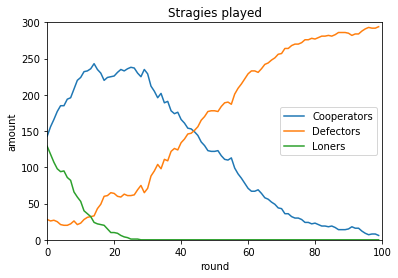

In [5]:
plt.title("Stragies played")
plt.xlabel("round")
plt.ylabel("amount")
plt.plot(np.arange(rounds),strategies[:,0],label="Cooperators")
plt.plot(np.arange(rounds),strategies[:,1],label="Defectors")
plt.plot(np.arange(rounds),strategies[:,2],label="Loners")
plt.ylim(0,nplayers)
plt.xlim(0,rounds)
plt.legend()